In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import collections
import scipy.stats

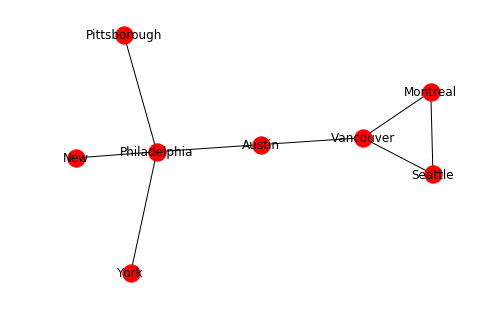

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0]])

In [12]:
File=open('Nodes.txt', 'rb')
G=nx.read_adjlist(File)
nx.draw(G, with_labels=True, node_colour='y')
plt.show()
A=nx.linalg.adjacency_matrix(G) #converts graph into adjacency matrix
S=A.toarray()
S

remember to save the text file before running any program

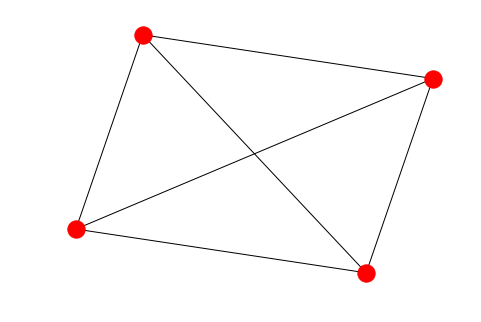

Average path length =  1.0
Average clustering coefficient=  1.0


In [26]:
G1=nx.complete_graph(4)
nx.draw(G1)
plt.show()
L=nx.average_shortest_path_length(G)
print 'Average path length = ', L #python 2 doesn't need brackets. with brackets, it comes out wrong. 
C=nx.average_clustering(G1)
print 'Average clustering coefficient= ',C #complete graphs have clustering coeff always = path length = 1

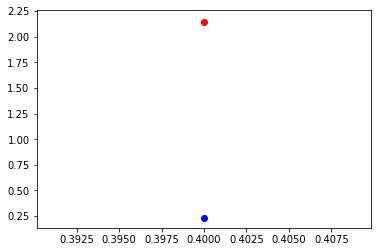

In [32]:
p=0.4
G2=nx.watts_strogatz_graph(20,4,p) #the last value 0.4 is the probability of the edge 
L=nx.average_shortest_path_length(G2)
C=nx.average_clustering(G2)
plt.scatter(p, L, color='r')
plt.scatter(p, C, color='b')
plt.show() #don't forget brackets after plt.show 

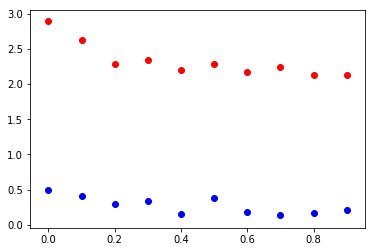

In [41]:
for p in np.arange(0.0,1.0,0.1): #in the case of loops using integers: for p in range (0,10)
    G3=nx.watts_strogatz_graph(20,4,p) #the last value 0.4 is the probability of the edge 
    L=nx.average_shortest_path_length(G3)
    C=nx.average_clustering(G3)
    plt.figure("Fig 1")
    plt.scatter(p, L, color='r')
    plt.scatter(p, C, color='b')
    
    
plt.show() #don't put plt.show within the indent. it will display it as several different graphs. 

In [4]:
n,p= 100,0.05
G1= nx.gnp_random_graph(n,p)
#nx.draw(G1,with_labels=True)
deg=nx.degree(G1)
#print (deg)
degree_sequence=sorted([d for n, d in G1.degree()], reverse=True)
degreeCount=collections.counter(degree_sequence)
deg,cnt=zip(*degreeCount.items())

#plot histogram
fig,ax=plt.subplots()
plt.bar(deg,cnt,width=0.8, color='b')
#cnt is an arrray of frequencies. so to get probability from frequency, divide the whole array by sum of elements in the array.
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

#x=scipy.linspace (0,10,11)
pmf=scipy.stats.binom.pmf(x,n,p)
plt.plot(x,pmf)

#draw graph in inset
#plt.loglog plots an exponential data set as a straight line



AttributeError: 'module' object has no attribute 'counter'

{0: 0.5555555555555556, 1: 0.5555555555555556, 2: 0.5555555555555556, 3: 0.4444444444444444, 4: 0.4444444444444444, 5: 0.3333333333333333, 6: 0.3333333333333333, 7: 0.1111111111111111, 8: 0.4444444444444444, 9: 0.2222222222222222}
({0: 0.35694444444444434, 1: 0.17129629629629628, 2: 0.06435185185185184, 3: 0.0412037037037037, 4: 0.1287037037037037, 5: 0.05972222222222222, 6: 0.009259259259259259, 7: 0.0, 8: 0.1222222222222222, 9: 0.018518518518518517}, {0: 0.3277544385188714, 1: 0.4205780967085861, 2: 0.4345963391675737, 3: 0.36298201590406437, 4: 0.3313088595173647, 5: 0.21856523398044703, 6: 0.2858942027038166, 7: 0.08080109094650478, 8: 0.3621060425770533, 9: 0.13468389400478387}, {0: 0.3464278916392712, 1: 0.3612883177016198, 2: 0.36029359039407205, 3: 0.33011634418297475, 4: 0.3280933490935247, 5: 0.2902299866914311, 6: 0.2976225468258462, 7: 0.23002938851605378, 8: 0.3319497985608123, 9: 0.25905238040185863})


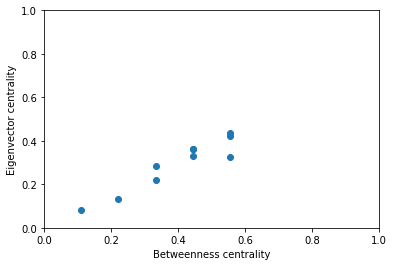

In [19]:
#centrality measures 
n=10
Gs=nx.gnp_random_graph(n,0.3)
#nx.draw(Gs,with_labels=True)
#plt.show()
dc=nx.degree_centrality(Gs)
print dc
ec=nx.eigenvector_centrality(Gs)
bc=nx.betweenness_centrality(Gs)
kc=nx.katz_centrality(Gs, alpha=0.1, beta=1.0)
print (bc, ec, kc)
#plt.show()
plt.figure()
plt.plot(dc.values(),ec.values(), 'o')
axes=plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.xlabel("Betweenness centrality")
plt.ylabel("Eigenvector centrality")
plt.show()

In [21]:
Dg=nx.DiGraph()
Dg.add_nodes_from([1,2,3])
Dg.add_edges_from([(1,2),(1,3),(3,1),(2,3)])
nx.pagerank(Dg,alpha=0.85)


{1: 0.387789442707259, 2: 0.21481051315058508, 3: 0.3974000441421556}